In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import Area_Avg as aa
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
sw = pk.load(open(\
    'Data/CanESM5_p2/Custom/Fluxes/CanESM5_p2_Custom_TrCLsw_FB_MZdecomp_Grid.pi','rb'))
lw = pk.load(open(\
    'Data/CanESM5_p2/Custom/Fluxes/CanESM5_p2_Custom_TrCLlw_FB_MZdecomp_Grid.pi','rb'))

p2_sw = pk.load(open(\
    'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
    
p2_lw = pk.load(open(\
    'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [3]:
sw_g = dict()
lw_g = dict()

p2_sw_g = dict()
p2_lw_g = dict()
for prop in sw.keys():
    sw_g[prop] = dict()
    lw_g[prop] = dict()
    p2_sw_g[prop] = dict()
    p2_lw_g[prop] = dict()
    for exp in sw[prop].keys():
        sw_g[prop][exp] = dict()
        lw_g[prop][exp] = dict()
        for hgt in sw[prop][exp].keys():
            sw_g[prop][exp][hgt] = np.average(np.mean(sw[prop][exp][hgt],axis=0),weights=coslat)
            lw_g[prop][exp][hgt] = np.average(np.mean(lw[prop][exp][hgt],axis=0),weights=coslat)
            
            p2_sw_g[prop][hgt] = np.average(p2_sw[prop][hgt],weights=coslat)
            p2_lw_g[prop][hgt] = np.average(p2_lw[prop][hgt],weights=coslat)

In [4]:
print('Comparing Feedback Strength using different methods')
for prop in sw_g.keys():
    print('\n',prop)
    for hgt in sw_g[prop]['5SST'].keys():
        print('\n',hgt)
        print('\nSW Regression - ',p2_sw_g[prop][hgt])
        print('SW Difference - ',sw_g[prop]['5SST'][hgt])
        print('\nLW Regression - ',p2_lw_g[prop][hgt])
        print('LW Difference - ',lw_g[prop]['5SST'][hgt])

Comparing Feedback Strength using different methods

 Standard

 Low

SW Regression -  0.5314018864028269
SW Difference -  0.5244103918779879

LW Regression -  -0.048224353649403265
LW Difference -  -0.04726288153596251

 Hi

SW Regression -  -0.45539087450996624
SW Difference -  -0.27440400946213966

LW Regression -  0.7646916838991638
LW Difference -  0.6579208316102616

 All

SW Regression -  0.07601101189286058
SW Difference -  0.25000638241584816

LW Regression -  0.7164673302497606
LW Difference -  0.610657950074299

 Amount

 Low

SW Regression -  0.5727775506135696
SW Difference -  0.5702210778993125

LW Regression -  -0.06635737616633143
LW Difference -  -0.07059314757079317

 Hi

SW Regression -  -0.1462223587872798
SW Difference -  -0.06157239364289036

LW Regression -  0.10141100159347506
LW Difference -  0.030260694176479176

 All

SW Regression -  0.3227465585464199
SW Difference -  0.4409997143761838

LW Regression -  -0.18521662492788316
LW Difference -  -0.253404876681

diff_stack_sw1 = dict()
diff_stack_lw1 = dict()

reg_stack_sw1 = dict()
reg_stack_lw1 = dict()

for prop in sw_g.keys():
    diff_stack_sw1[prop] = np.stack(list(sw_g[prop]['5SST'].values()),axis=0)
    diff_stack_lw1[prop] = np.stack(list(lw_g[prop]['5SST'].values()),axis=0)
    
    reg_stack_sw1[prop] = np.stack(list(p2_sw_g[prop].values()),axis=0)
    reg_stack_lw1[prop] = np.stack(list(p2_lw_g[prop].values()),axis=0)
    
diff_stk_sw = np.stack(list(diff_stack_sw1.values()),axis=0).reshape(18)
diff_stk_lw = np.stack(list(diff_stack_lw1.values()),axis=0).reshape(18)

reg_stk_sw = np.stack(list(reg_stack_sw1.values()),axis=0).reshape(18)
reg_stk_lw = np.stack(list(reg_stack_lw1.values()),axis=0).reshape(18)

plt.figure(figsize=(12,6),dpi=300)
plt.suptitle('Decomposed Cloud Feedback Method Comparison')

plt.subplot(121)
plt.title('CanESM5-p2 Shortwave')
plt.scatter(diff_stk_sw,reg_stk_sw)
plt.xlabel('Finite Difference (30 year means)')
plt.ylabel('Regression (150 years)')
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)
plt.plot(np.linspace(-1,1,18),np.linspace(-1,1,18),color='k',linestyle=':')

plt.subplot(122)
plt.title('CanESM5-p2 Longwave')
plt.xlabel('Finite Difference (30 year means)')
plt.ylabel('Regression (150 years)')
plt.scatter(diff_stk_lw,reg_stk_lw)
plt.plot(np.linspace(-1,1,18),np.linspace(-1,1,18),color='k',linestyle=':')
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)

#plt.savefig('CLD_FB_Methods_Comp.png',bbox_inches='tight')

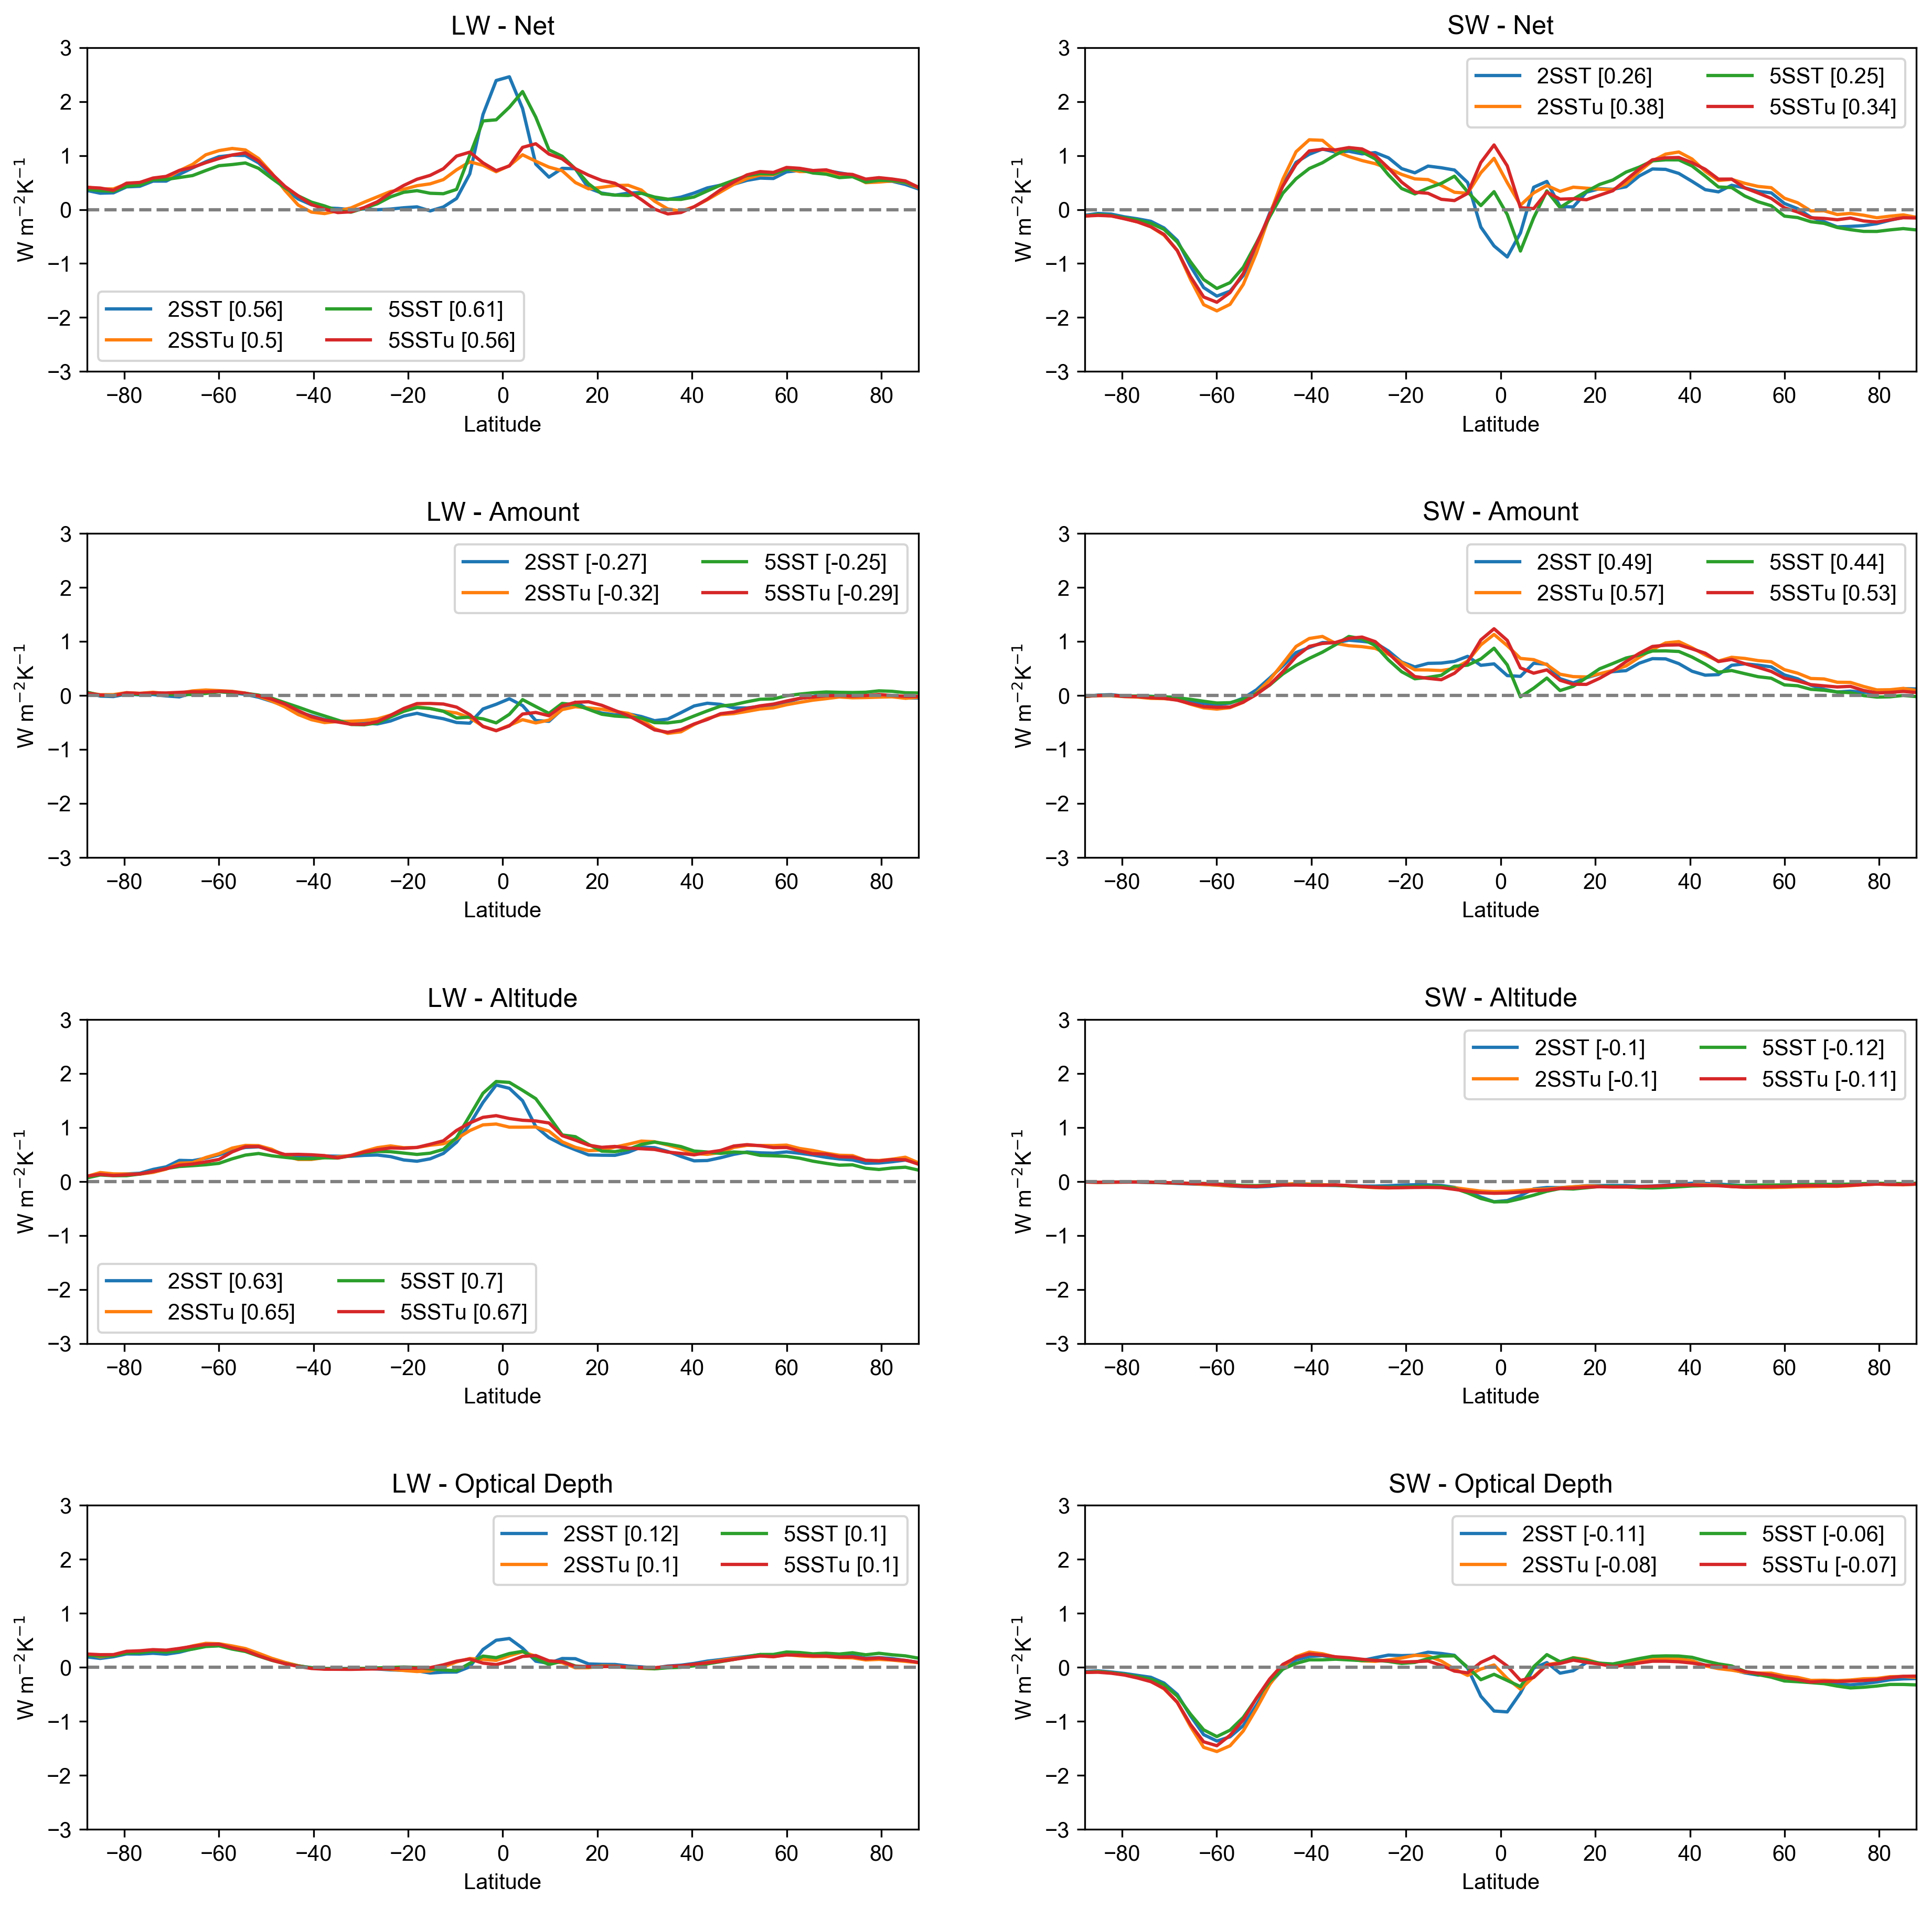

In [6]:
plt.figure(figsize=(15,15),dpi=300)
exps = ['2SST','2SSTu','5SST','5SSTu']

plt.subplot(421)
plt.title('LW - Net')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Standard'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Standard'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(422)
plt.title('SW - Net')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Standard'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Standard'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(423)
plt.title('LW - Amount')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Amount'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Amount'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(424)
plt.title('SW - Amount')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Amount'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Amount'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

plt.subplot(425)
plt.title('LW - Altitude')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Altitude'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Altitude'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(426)
plt.title('SW - Altitude')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Altitude'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Altitude'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(427)
plt.title('LW - Optical Depth')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Optical Depth'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Optical Depth'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(428)
plt.title('SW - Optical Depth')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Optical Depth'][exps[i]]['All'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Optical Depth'][exps[i]]['All'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplots_adjust(hspace=0.5)

#plt.savefig('CanESM5_Custom_CLD_FB.png',bbox_inches='tight')

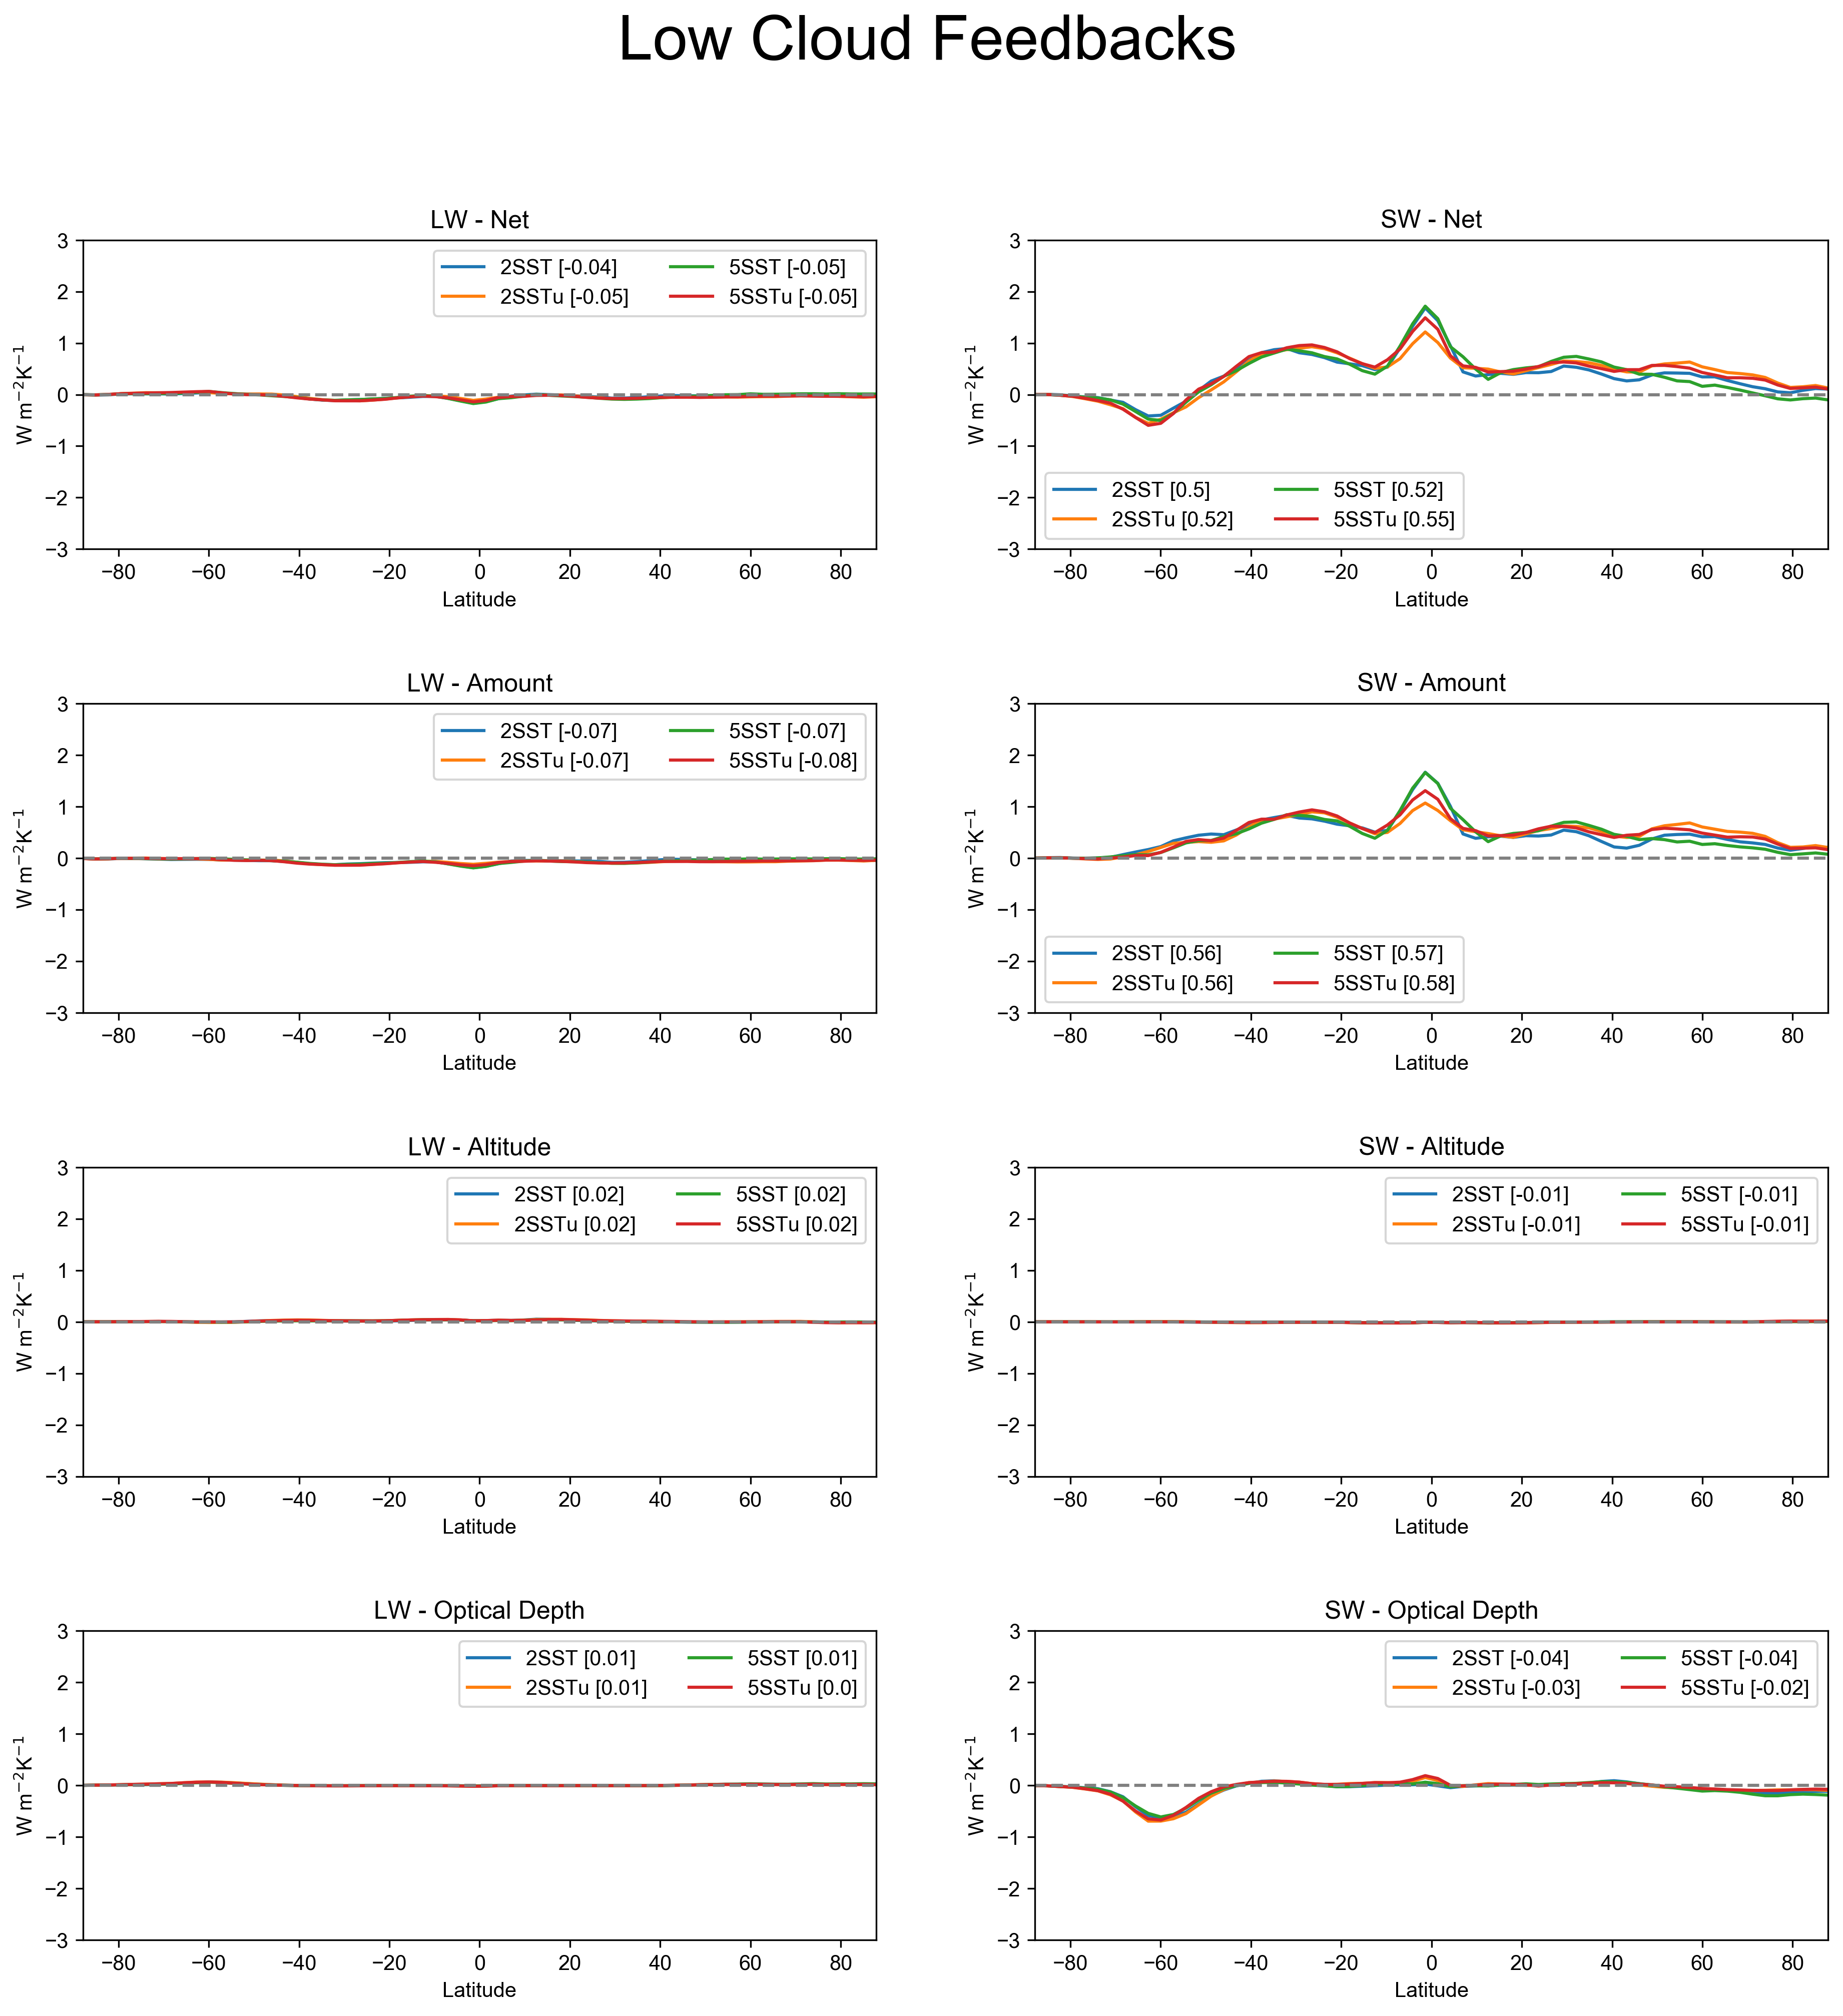

In [7]:
plt.figure(figsize=(15,15),dpi=300)
exps = ['2SST','2SSTu','5SST','5SSTu']

plt.suptitle('Low Cloud Feedbacks',fontsize=30)
plt.subplot(421)
plt.title('LW - Net')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Standard'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Standard'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(422)
plt.title('SW - Net')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Standard'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Standard'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(423)
plt.title('LW - Amount')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Amount'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Amount'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(424)
plt.title('SW - Amount')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Amount'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Amount'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

plt.subplot(425)
plt.title('LW - Altitude')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Altitude'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Altitude'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(426)
plt.title('SW - Altitude')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Altitude'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Altitude'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(427)
plt.title('LW - Optical Depth')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Optical Depth'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Optical Depth'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(428)
plt.title('SW - Optical Depth')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Optical Depth'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Optical Depth'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplots_adjust(hspace=0.5)

#plt.savefig('CanESM5_Custom_LowCLD_FB.png',bbox_inches='tight')

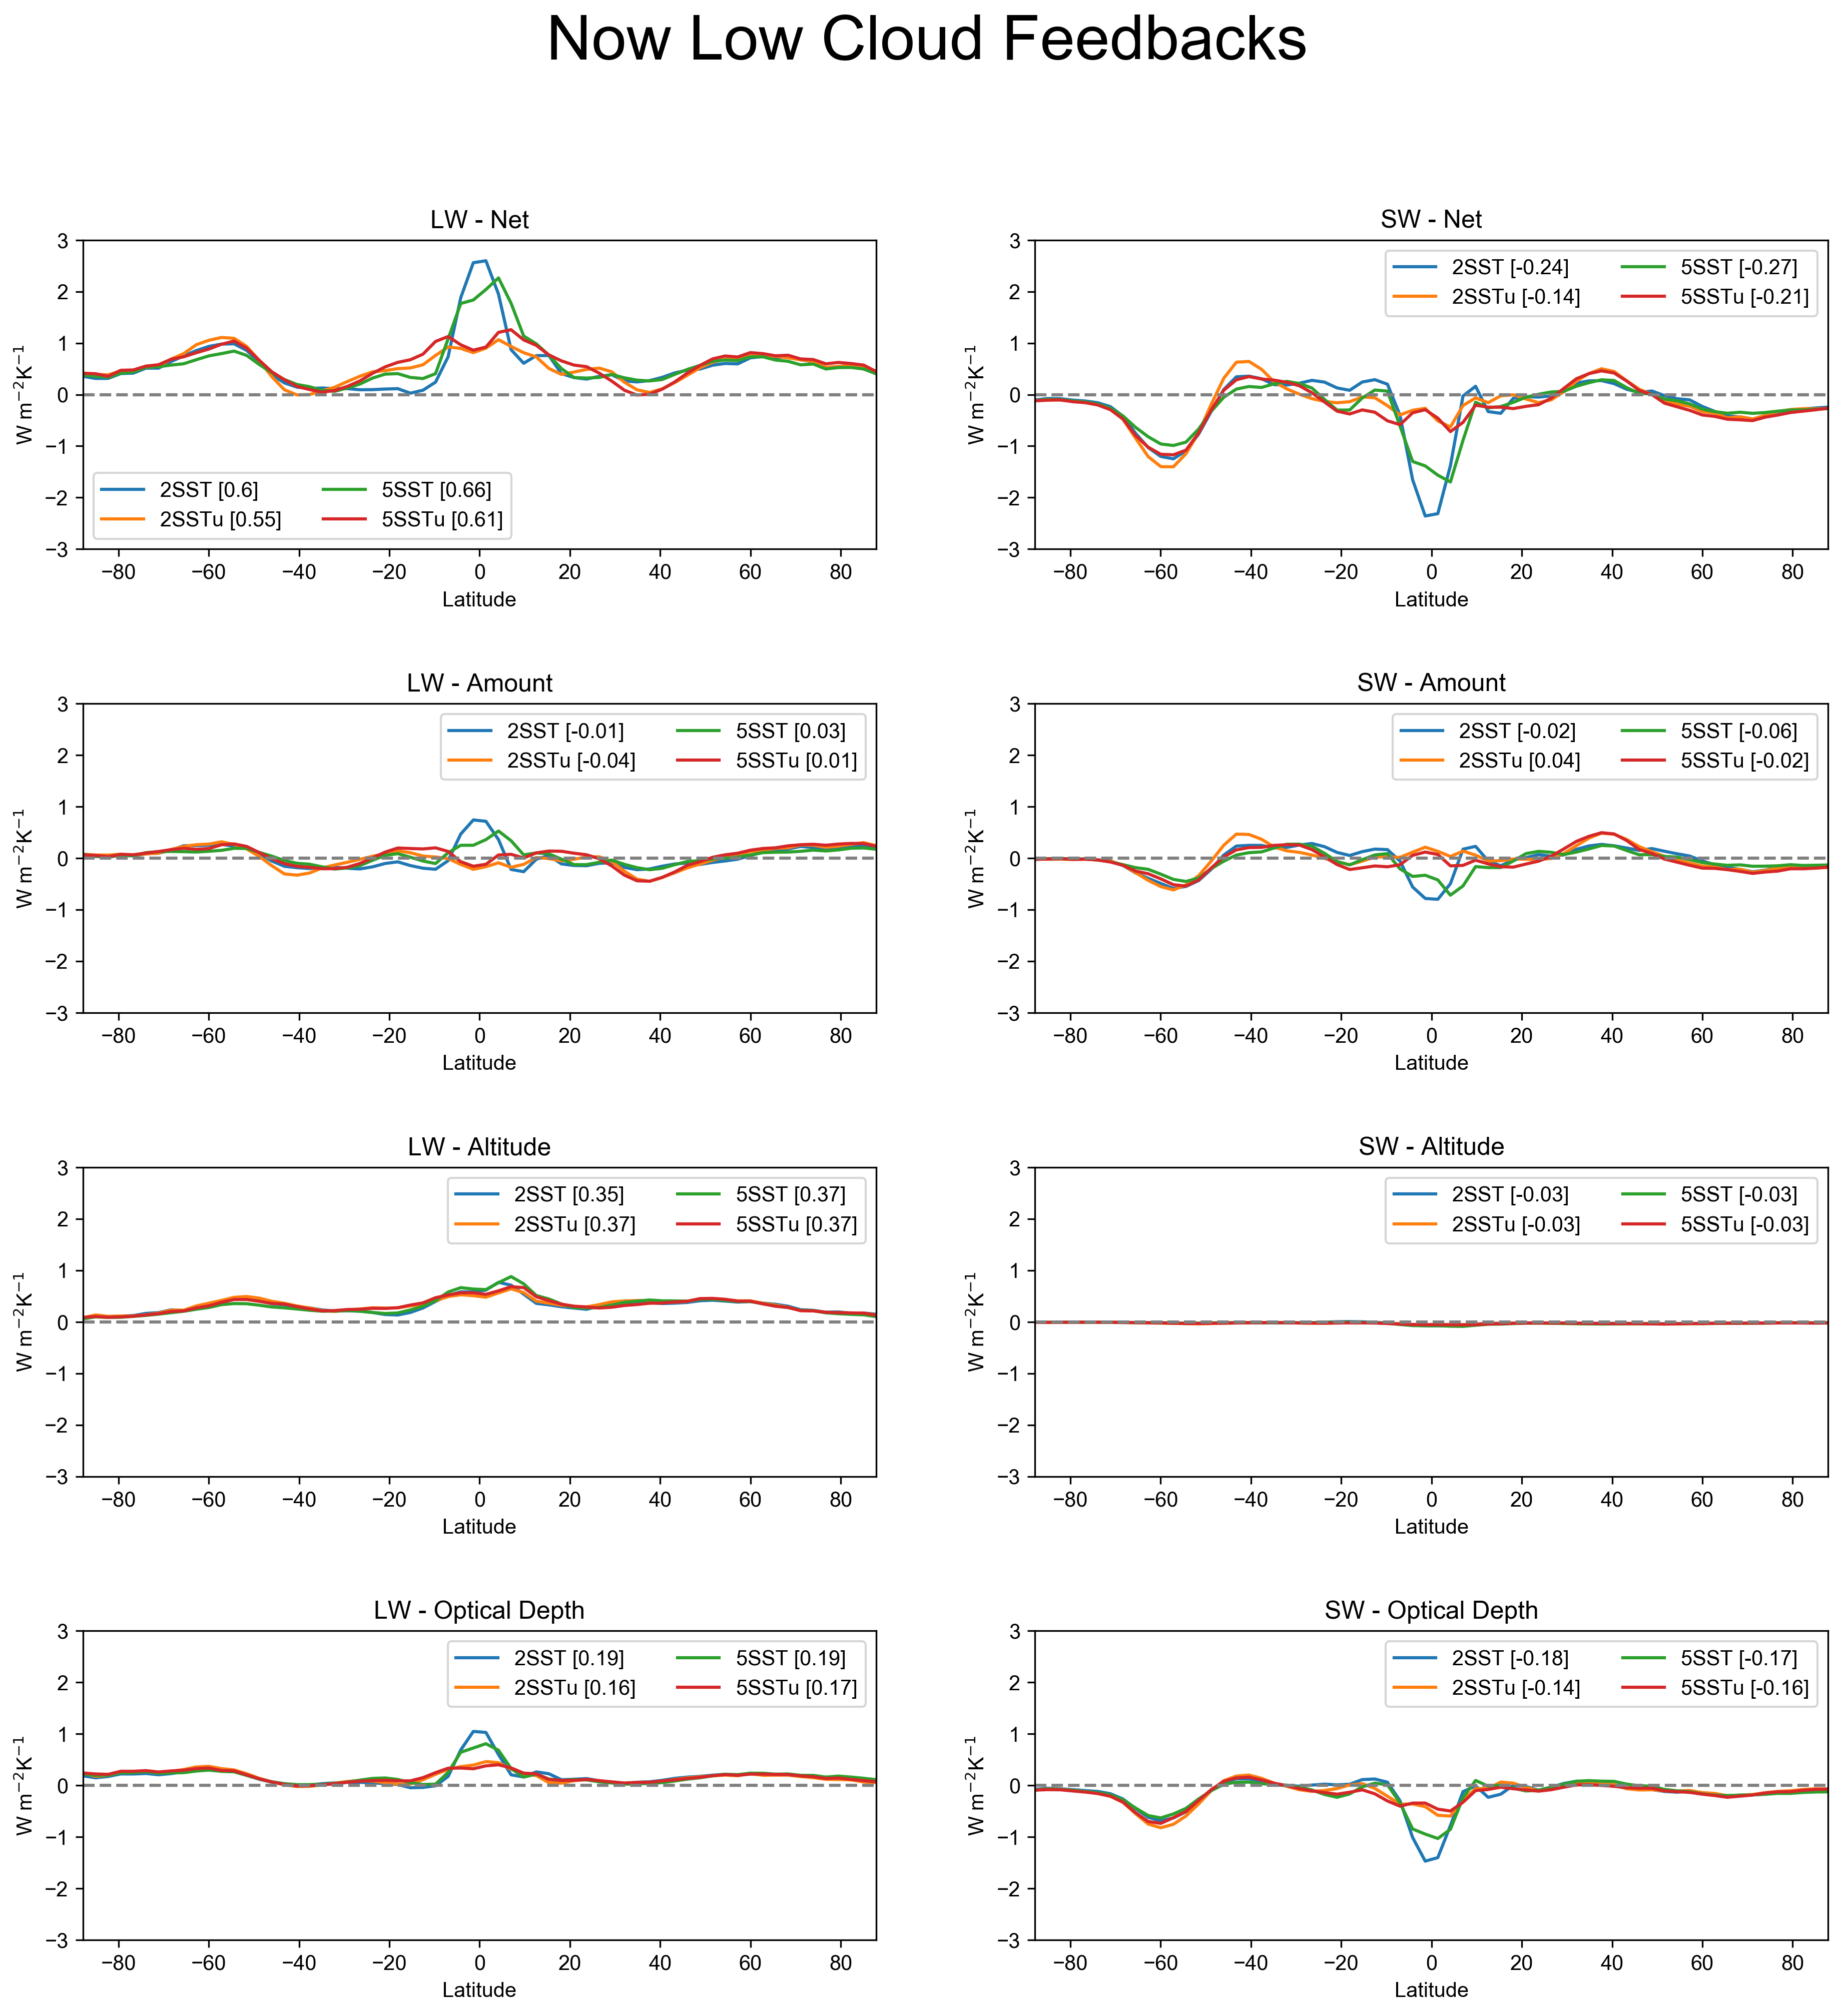

In [123]:
plt.figure(figsize=(15,15),dpi=300)
exps = ['2SST','2SSTu','5SST','5SSTu']

plt.suptitle('Now Low Cloud Feedbacks',fontsize=30)
plt.subplot(421)
plt.title('LW - Net')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Standard'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Standard'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(422)
plt.title('SW - Net')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Standard'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Standard'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(423)
plt.title('LW - Amount')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Amount'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Amount'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(424)
plt.title('SW - Amount')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Amount'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Amount'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

plt.subplot(425)
plt.title('LW - Altitude')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Altitude'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Altitude'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(426)
plt.title('SW - Altitude')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Altitude'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Altitude'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(427)
plt.title('LW - Optical Depth')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Optical Depth'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Optical Depth'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplot(428)
plt.title('SW - Optical Depth')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Optical Depth'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Optical Depth'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.xlabel('Latitude')
plt.axhline(0,color='grey',linestyle='--')

plt.subplots_adjust(hspace=0.5)

plt.savefig('CanESM5_Custom_HiCLD_FB.png',bbox_inches='tight')

## Selected Responses

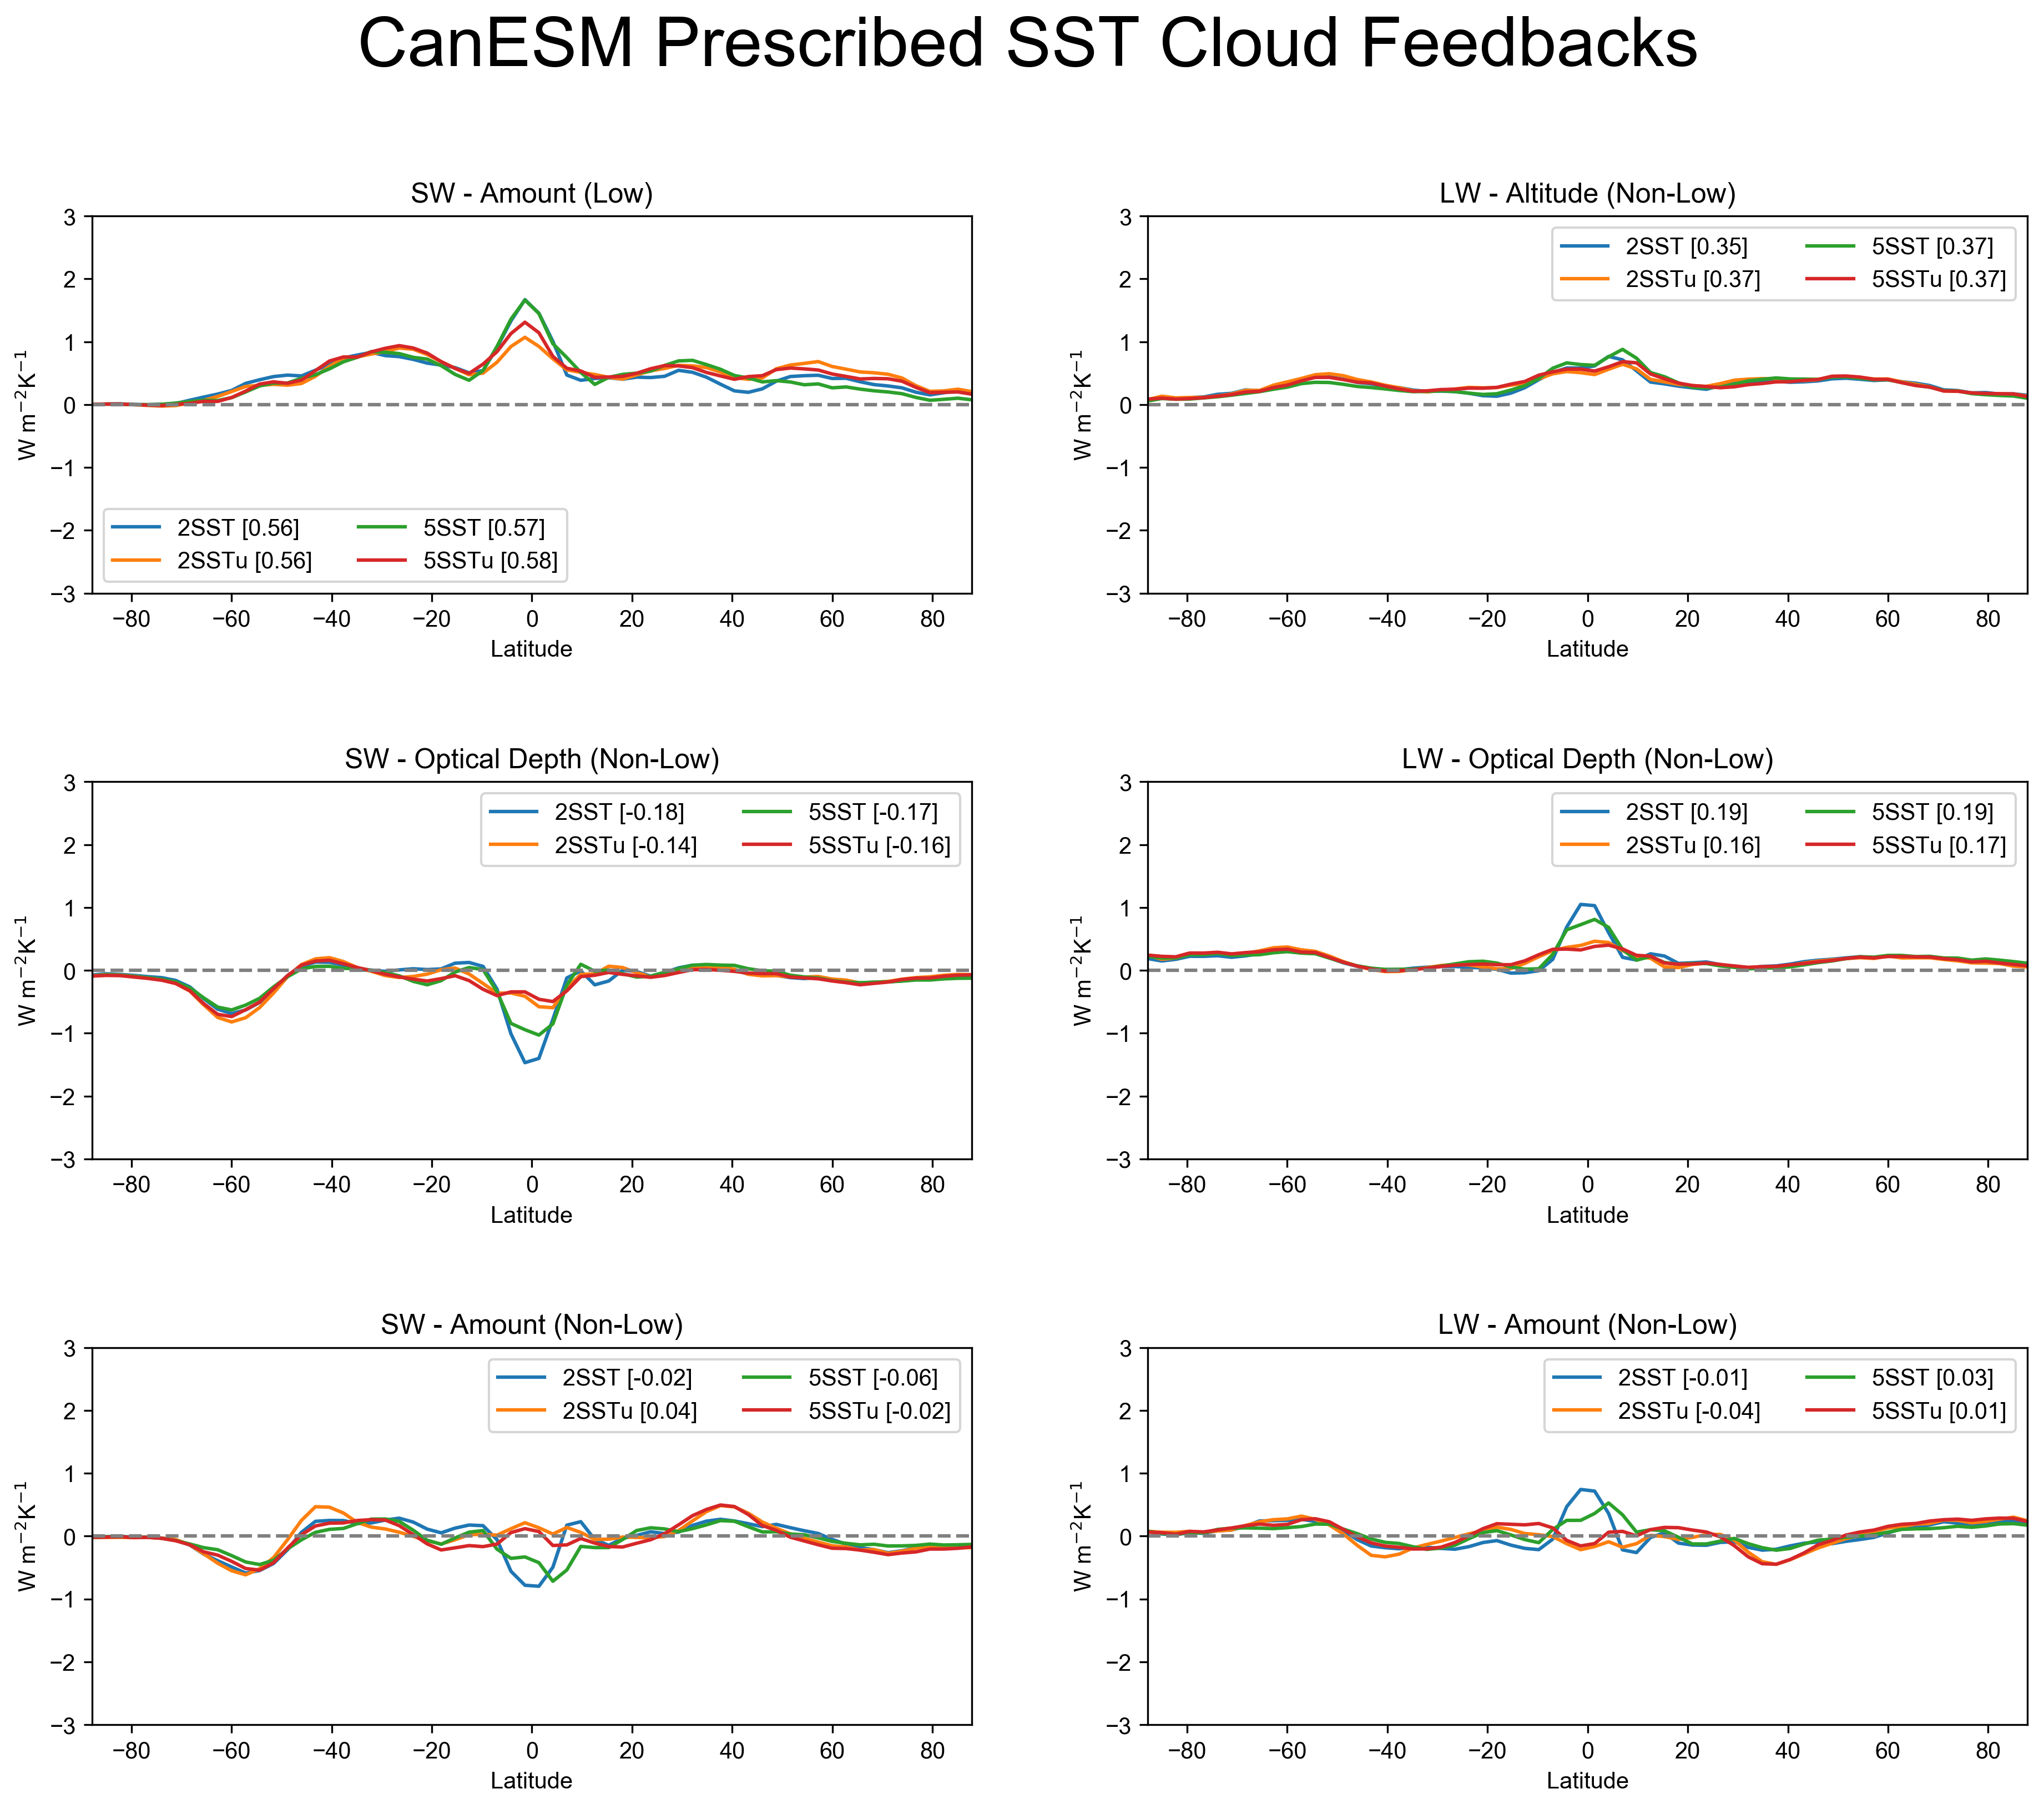

In [17]:
plt.figure(figsize=(15,12),dpi=300)
exps = ['2SST','2SSTu','5SST','5SSTu']

plt.suptitle('CanESM Prescribed SST Cloud Feedbacks',fontsize=30)


#LOW CLOUD AMOUNT
plt.subplot(321)
plt.title('SW - Amount (Low)')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Amount'][exps[i]]['Low'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Amount'][exps[i]]['Low'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

#HIGH CLOUD ALTITUDE
plt.subplot(322)
plt.title('LW - Altitude (Non-Low)')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Altitude'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Altitude'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

#Hi Cloud Optical Depth
plt.subplot(323)
plt.title('SW - Optical Depth (Non-Low)')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Optical Depth'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Optical Depth'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

#HIGH CLOUD Optical Depth
plt.subplot(324)
plt.title('LW - Optical Depth (Non-Low)')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Optical Depth'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Optical Depth'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

#Hi Cloud Amount
plt.subplot(325)
plt.title('SW - Amount (Non-Low)')
for i in range(4):
    plt.plot(lat,np.nanmean(sw['Amount'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(sw_g['Amount'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')

#HIGH CLOUD ALTITUDE
plt.subplot(326)
plt.title('LW - Amount (Non-Low)')
for i in range(4):
    plt.plot(lat,np.nanmean(lw['Amount'][exps[i]]['Hi'],axis=(0,2)),\
             label='{} [{}]'.format(exps[i],\
    round(lw_g['Amount'][exps[i]]['Hi'],2)))
plt.legend(ncol=2)
plt.ylim(-3,3)
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Latitude')


plt.subplots_adjust(hspace=0.5)

plt.savefig('CanESM_SST_CLD_FB_ZM.png',bbox_inches='tight')